In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://postgres:j@mesennisk1cksass@localhost:5432/SQLChallenge_DB')
connection = engine.connect()
#used this link to help connect: https://medium.com/analytics-vidhya/postgresql-integration-with-jupyter-notebook-deb97579a38d


In [10]:
employees_df = pd.read_sql("select * from employee_detail", connection)
employees_df.head(10)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993


In [11]:
salaries_df = pd.read_sql("select * from salary", connection)
salaries_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [15]:
employee_salary = pd.merge(employees_df, salaries_df, how='inner')

In [16]:
employee_salary.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [17]:
employee_salary["salary"].min()

40000

In [18]:
employee_salary["salary"].max()

129492

In [20]:
employee_salary["salary"].mean()

52970.732451403885

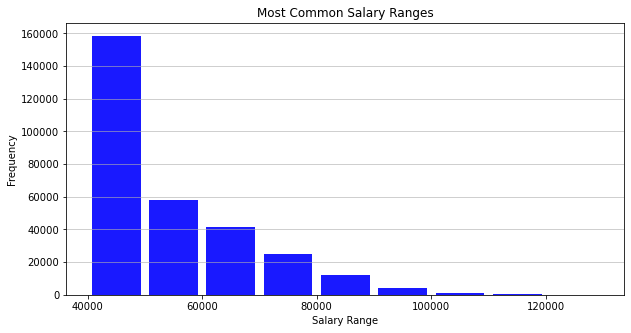

In [21]:
plt.figure(figsize=(10,5))
bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
n, bins, patches = plt.hist(x=employee_salary["salary"], bins = bins, color = 'b', alpha=0.9, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Salary Range')
plt.ylabel('Frequency')
plt.title('Most Common Salary Ranges')
plt.show()